In [15]:
%matplotlib inline 

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [4]:
df = pd.read_csv('data_raw/train.csv')


C:\Users\Mateusz\AppData\Local\Temp\ipykernel_15556\4207432485.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/train.csv')


In [5]:

# Display the first few rows and basic info
df_head = df.head()
df_info = df.info()
df_shape = df.shape
df_description = df.describe(include="all")

df_head, df_shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001599 entries, 0 to 1001598
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1001599 non-null  int64 
 1   DayOfWeek      1001599 non-null  int64 
 2   Date           1001599 non-null  object
 3   Sales          1001599 non-null  int64 
 4   Customers      1001599 non-null  int64 
 5   Open           1001599 non-null  int64 
 6   Promo          1001599 non-null  int64 
 7   StateHoliday   1001599 non-null  object
 8   SchoolHoliday  1001599 non-null  int64 
 9   Id             1001599 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 76.4+ MB


(, (1001599, 10), )

2025-04-06 10:05:35.199 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-06 10:05:39.080 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.



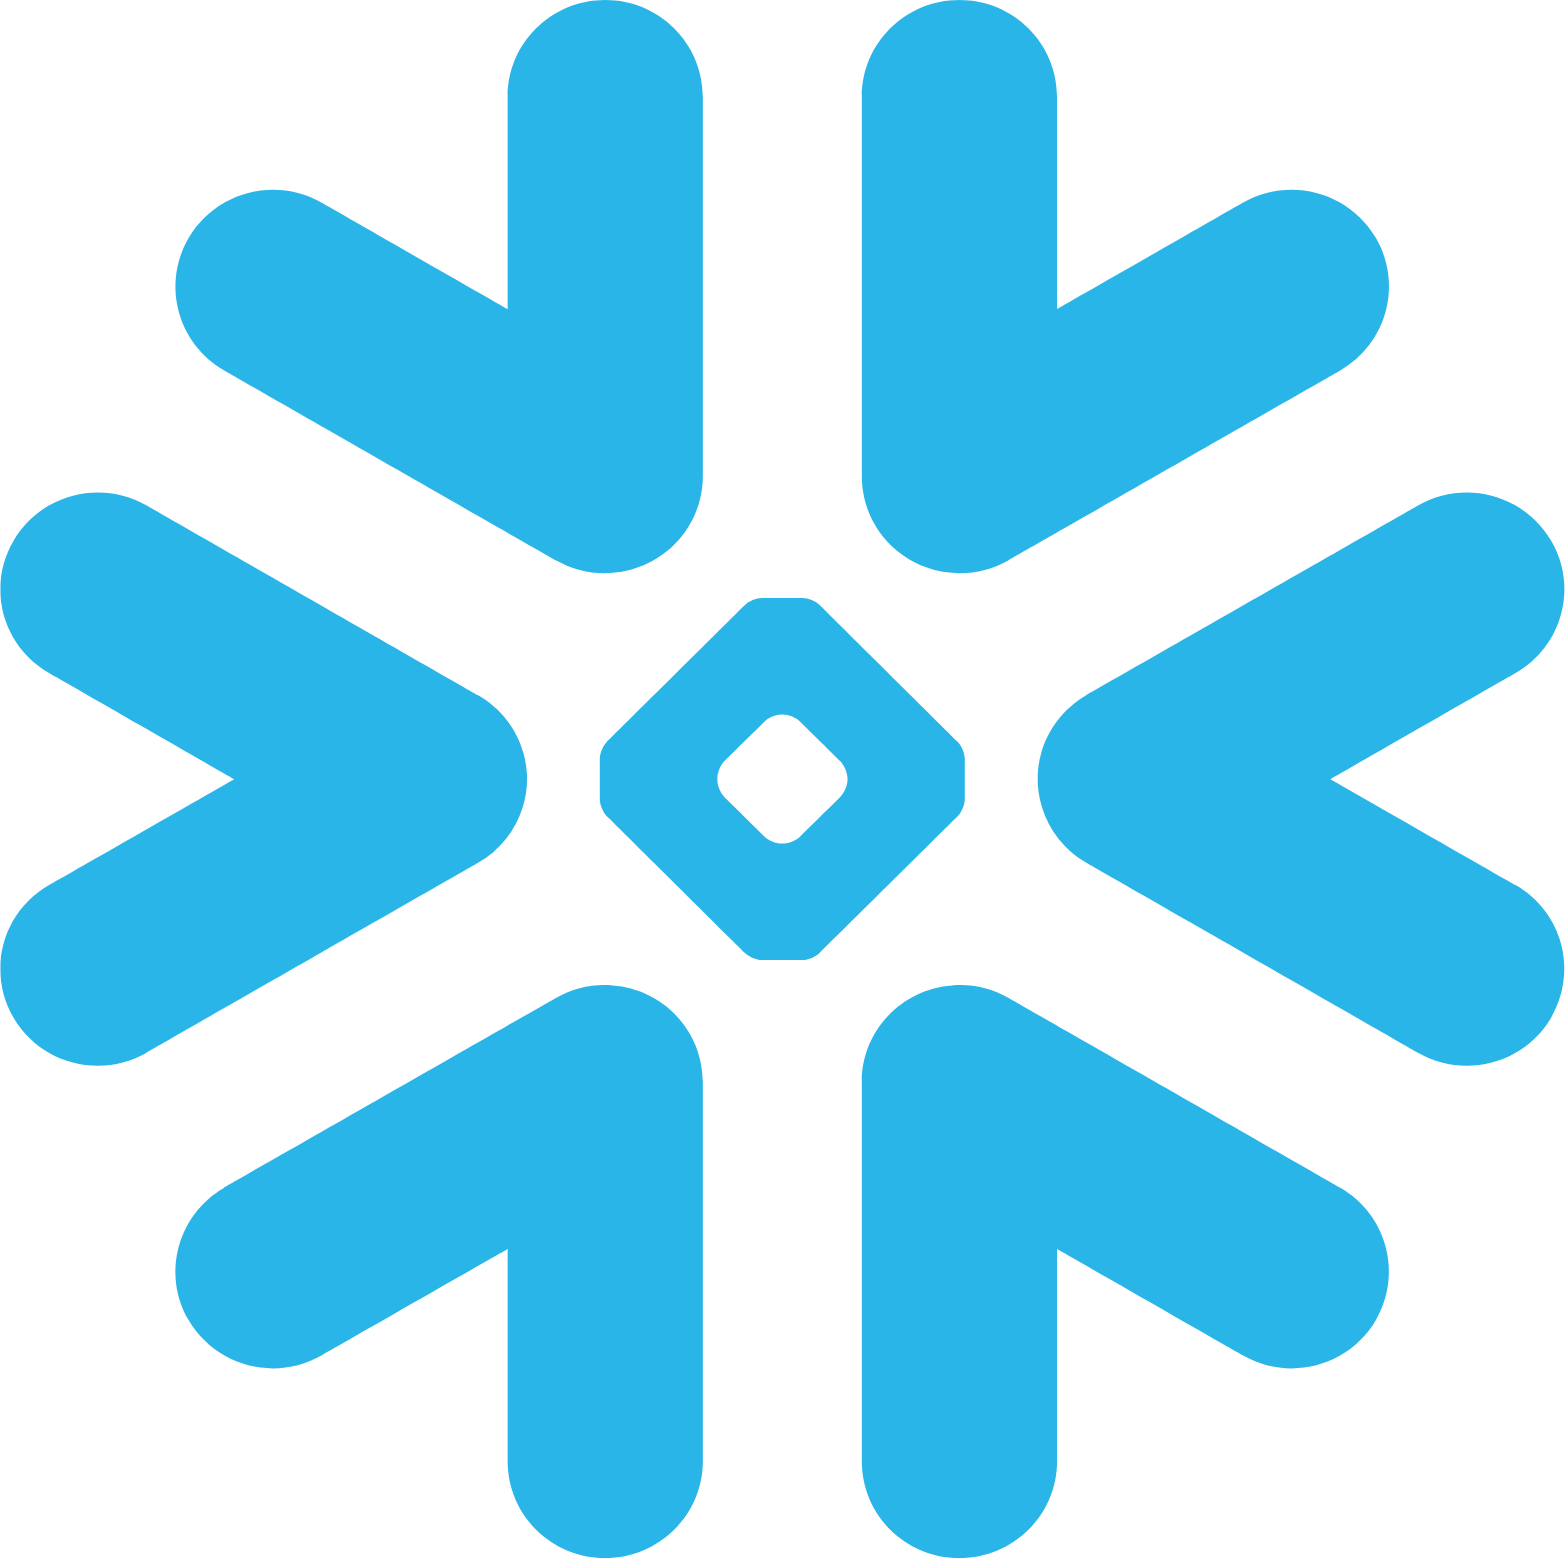

In [11]:
df_description

## 📊 Dataset Overview

**Shape:** 
- 1001599 rows × 10 columns

**Columns:**
- Store
- DayOfWeek
- Date
- Sales
- Customers
- Open
- Promo
- StateHoliday
- SchoolHoliday
- Id

**Data Types:**
- Most columns are numeric (`int64`), while `Date` and `StateHoliday` are objects (strings).

**Missing Values:**
- No missing values in any column (at least not in terms of nulls).

**Date Column:**
- Originally not in datetime format, but we have converted it for further analysis.

**Sales Range:**
- From 0 to 41,551

**Customers Range:**
- From 0 to 7,388 

## Univariate Analysis

C:\Users\Mateusz\AppData\Local\Temp\ipykernel_15556\3921311925.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df, ax=axs[1, 0], palette='viridis')
C:\Users\Mateusz\AppData\Local\Temp\ipykernel_15556\3921311925.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Open', data=df, ax=axs[1, 1], palette='coolwarm')
C:\Users\Mateusz\AppData\Local\Temp\ipykernel_15556\3921311925.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Promo', data=df, ax=axs[2, 0], palette='Spectral')
C:\Users\Mateusz\AppData\Loca

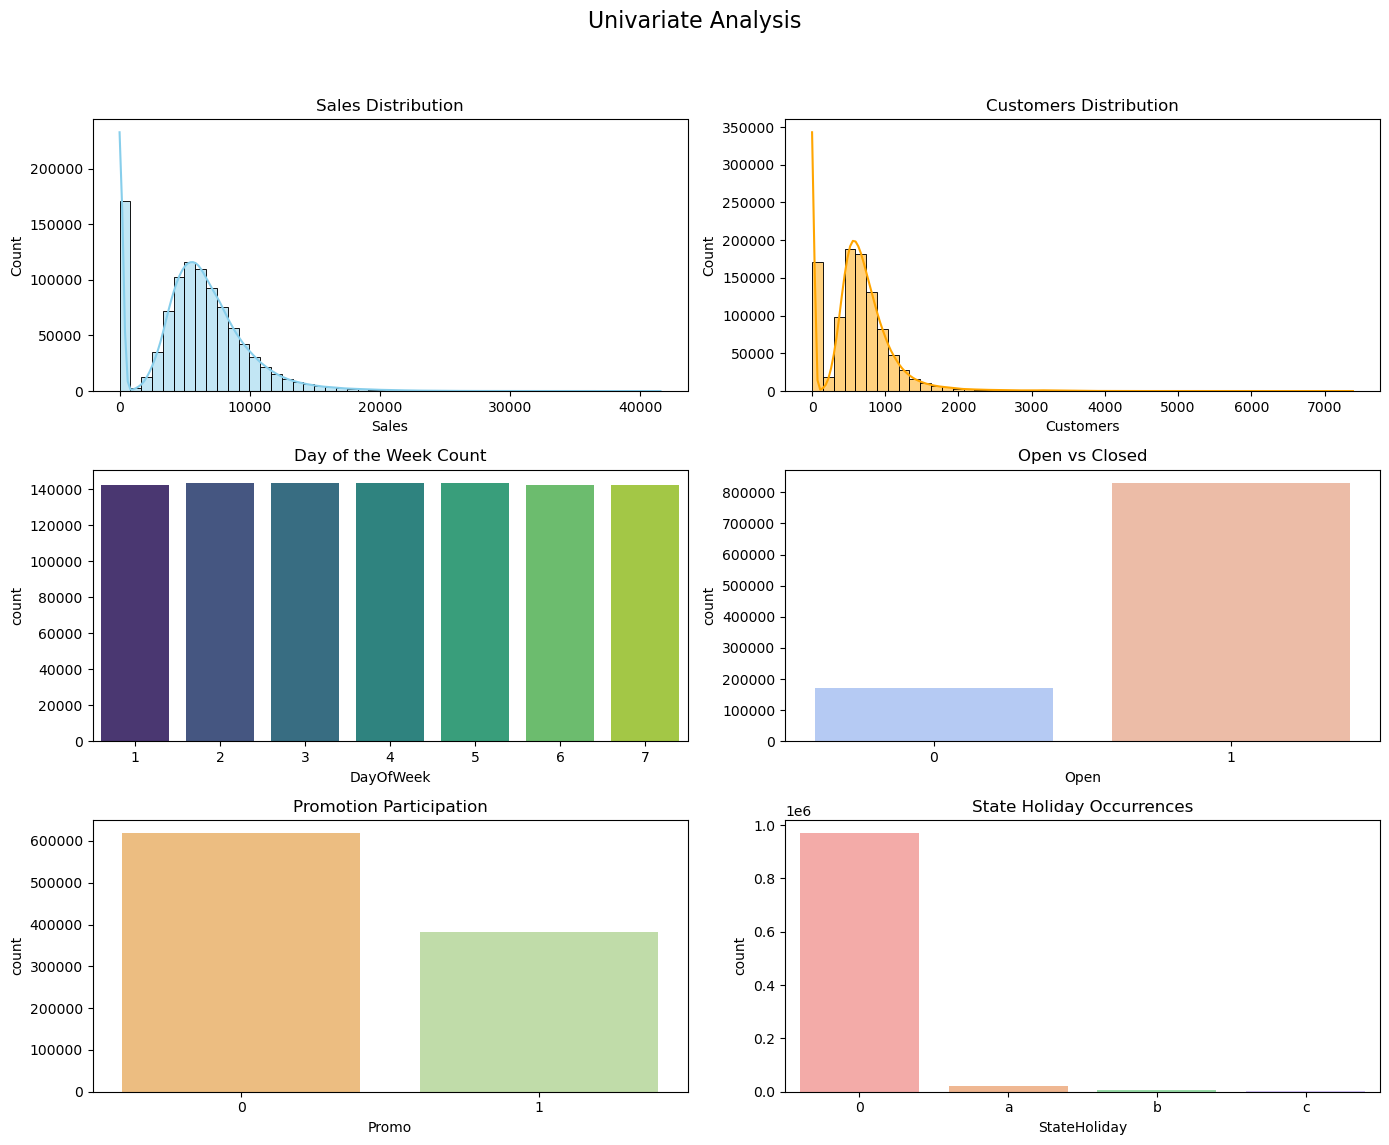

In [18]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set up plotting
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Univariate Analysis", fontsize=16)

# Sales distribution
sns.histplot(df['Sales'], bins=50, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Sales Distribution')

# Customers distribution
sns.histplot(df['Customers'], bins=50, kde=True, ax=axs[0, 1], color='orange')
axs[0, 1].set_title('Customers Distribution')

# DayOfWeek count
sns.countplot(x='DayOfWeek', data=df, ax=axs[1, 0], palette='viridis')
axs[1, 0].set_title('Day of the Week Count')

# Open distribution
sns.countplot(x='Open', data=df, ax=axs[1, 1], palette='coolwarm')
axs[1, 1].set_title('Open vs Closed')

# Promo distribution
sns.countplot(x='Promo', data=df, ax=axs[2, 0], palette='Spectral')
axs[2, 0].set_title('Promotion Participation')

# StateHoliday distribution
sns.countplot(x='StateHoliday', data=df, ax=axs[2, 1], palette='pastel')
axs[2, 1].set_title('State Holiday Occurrences')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Univariate visualizations Insights:

- Sales: The distribution is right-skewed — most sales fall below 10,000, with a few high outliers.

- Customers: Similar right-skew — most values are concentrated in the lower ranges.

- Day of the Week: Fairly even distribution across the week (1=Monday, 7=Sunday), though some days may be slightly more represented.

- Open: Most records are for open days (1), with some closed days (0).

- Promo: About 38% of the days had active promotions.

- StateHoliday: Most days are non-holidays (0), with some holiday days marked as a, b, or c.




C:\Users\Mateusz\AppData\Local\Temp\ipykernel_15556\634193237.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Promo', y='Sales', data=df, ax=axs[0, 1], palette='Blues')
C:\Users\Mateusz\AppData\Local\Temp\ipykernel_15556\634193237.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DayOfWeek', y='Sales', data=df, ax=axs[1, 0], palette='Greens')
C:\Users\Mateusz\AppData\Local\Temp\ipykernel_15556\634193237.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='StateHoliday', y='Sales', data=df, ax=axs[1, 1], palette='Reds')
C:\Us

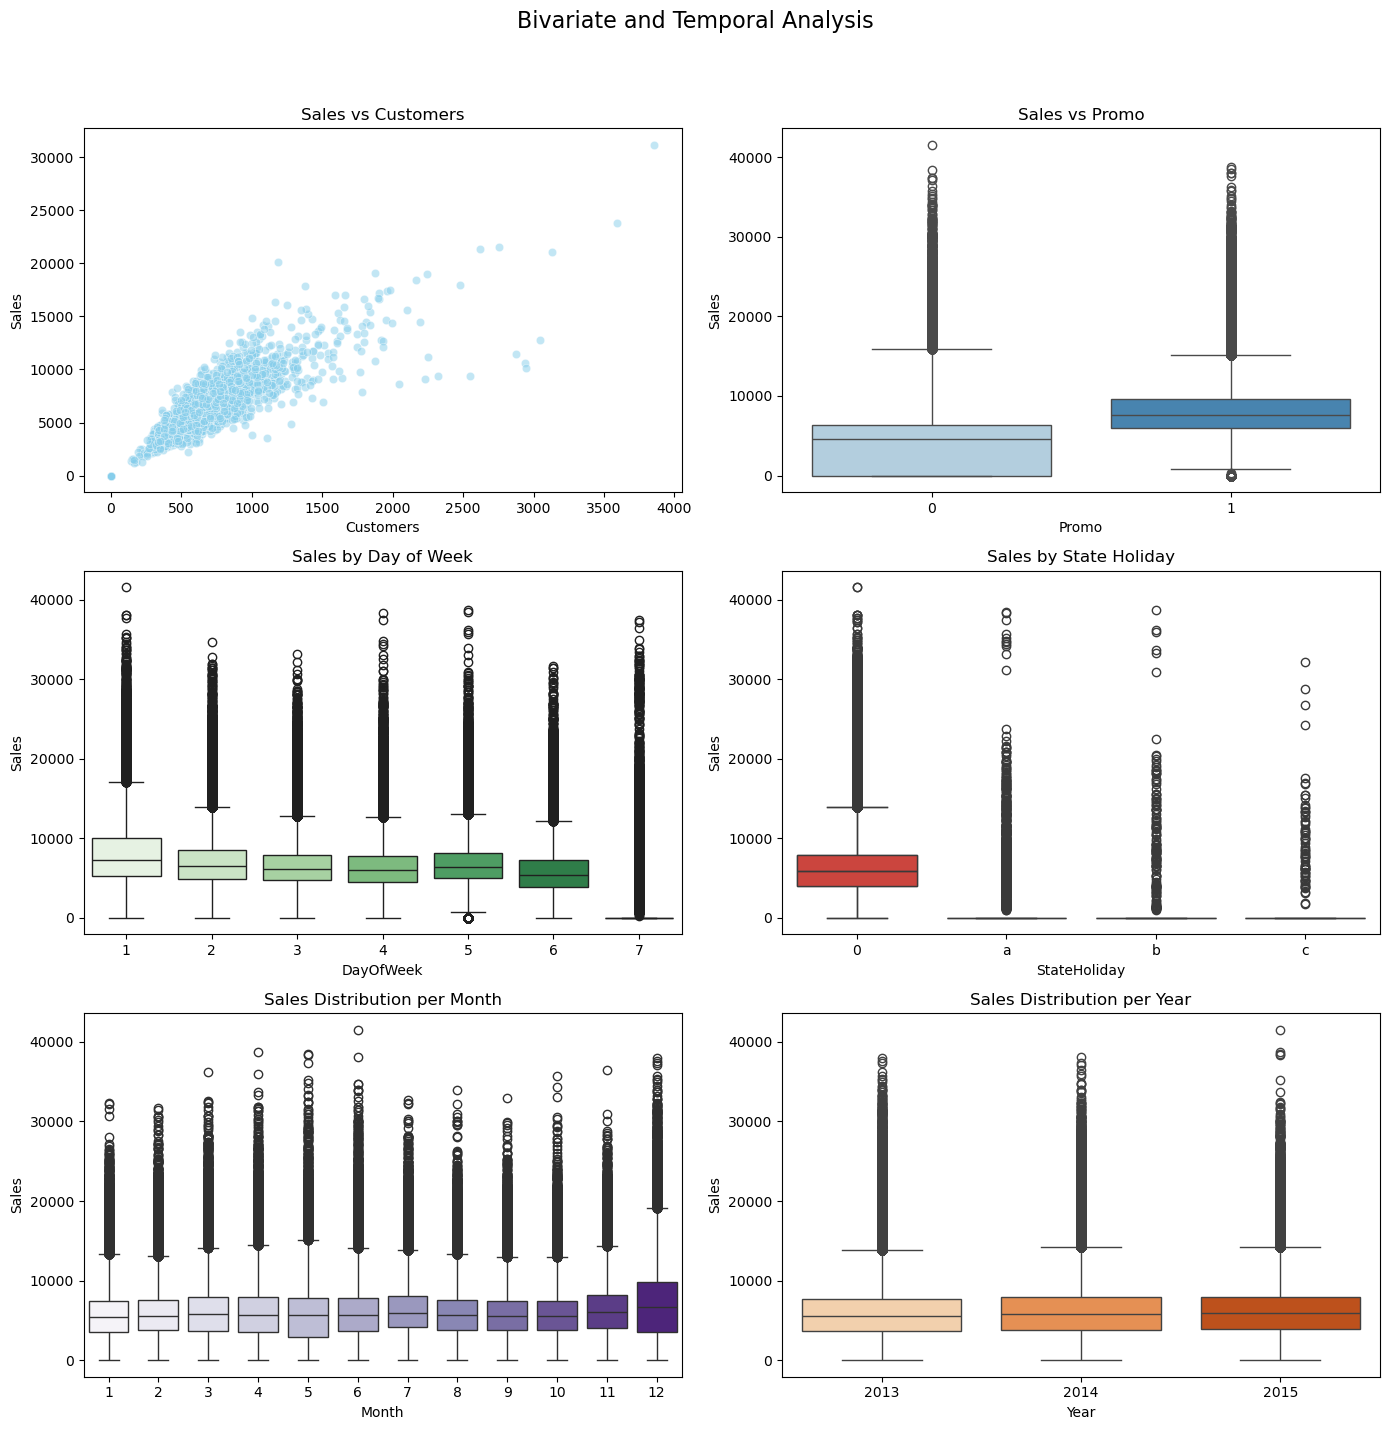

In [37]:
# Set up the plotting space
fig, axs = plt.subplots(3, 2, figsize=(14, 15))
fig.suptitle("Bivariate and Temporal Analysis", fontsize=16)

# Sales vs Customers (scatter plot)
sns.scatterplot(x='Customers', y='Sales', data=df.sample(2000), alpha=0.5, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Sales vs Customers')

# Sales vs Promo (box plot)
sns.boxplot(x='Promo', y='Sales', data=df, ax=axs[0, 1], palette='Blues')
axs[0, 1].set_title('Sales vs Promo')

# Sales by Day of Week (box plot)
sns.boxplot(x='DayOfWeek', y='Sales', data=df, ax=axs[1, 0], palette='Greens')
axs[1, 0].set_title('Sales by Day of Week')

# Sales by State Holiday (box plot)
sns.boxplot(x='StateHoliday', y='Sales', data=df, ax=axs[1, 1], palette='Reds')
axs[1, 1].set_title('Sales by State Holiday')

# Extract month and year from Date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Sales distribution per month (box plot)
sns.boxplot(x='Month', y='Sales', data=df, ax=axs[2, 0], palette='Purples')
axs[2, 0].set_title('Sales Distribution per Month')

# Sales distribution per year (box plot)
sns.boxplot(x='Year', y='Sales', data=df, ax=axs[2, 1], palette='Oranges')
axs[2, 1].set_title('Sales Distribution per Year')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Bivariate and Temporal Analysis Observations

#### Sales vs. Customers
- There is a strong positive correlation; more customers generally lead to higher sales.

#### Sales vs. Promo
- Stores tend to make slightly higher sales when promotions are active (Promo = 1), though the spread is large.

#### Sales by Day of the Week
- Saturdays (DayOfWeek = 6) generally show higher median sales.
- Sundays (DayOfWeek = 7) are rare and often closed (sales at 0).

#### Sales by State Holiday
- On state holidays (a, b, c), most stores appear to be closed or have lower sales, but there are some outliers with high sales.

#### Sales Distribution per Month
- Sales tend to be highest in the last quarter of the year, likely due to holiday shopping. Some months may show seasonal peaks depending on regional events.

## Sales Distribution per Year
- A general upward trend in sales could be observed, indicating year-over-year growth in sales figures. Economic factors and store expansions can also influence these trends.


## Correlation Analysis

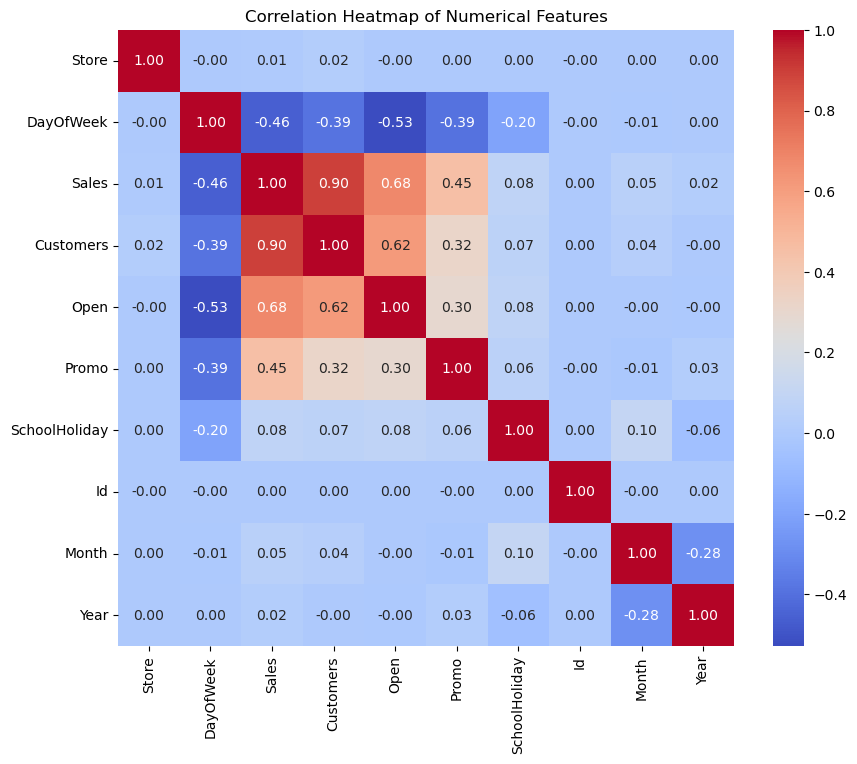

In [21]:
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


🔍 Key Observations:
- Sales & Customers: Strong positive correlation (0.81) — more customers typically mean higher sales.

- Promo & Sales: Mild positive correlation (~0.17), indicating that promotions might help boost sales, but not always.

- Open: Negatively correlated with Sales and Customers, because closed days have zero values.

Other correlations are relatively weak or negligible.

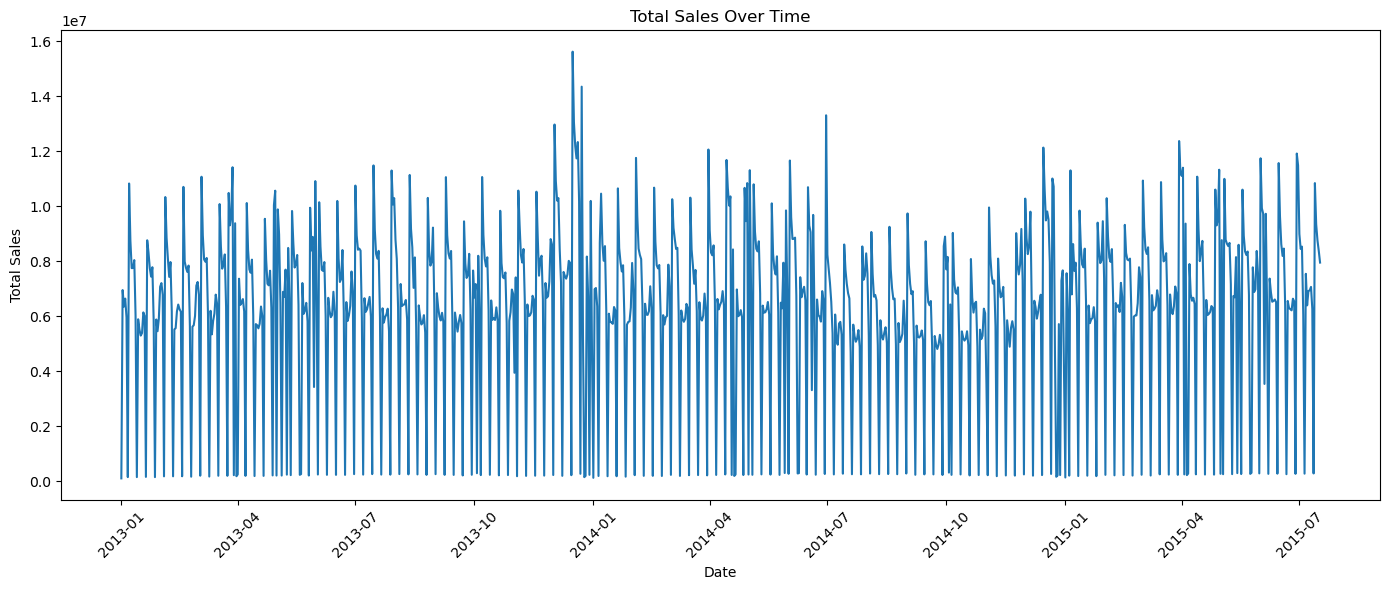

In [24]:
# Group by date to explore overall sales trend
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()

# Plot the time trend of total sales
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales, x='Date', y='Sales')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Time trends analysis

#### 📈 Observations:
- There’s a noticeable weekly seasonality — regular ups and downs that suggest weekend or weekly shopping patterns.

- Occasional dips may represent public holidays, store closures, or anomalies.

- No strong long-term trend is obvious (e.g., growth or decline), indicating a relatively stable sales cycle during the observed period.

## Individual Store Performance

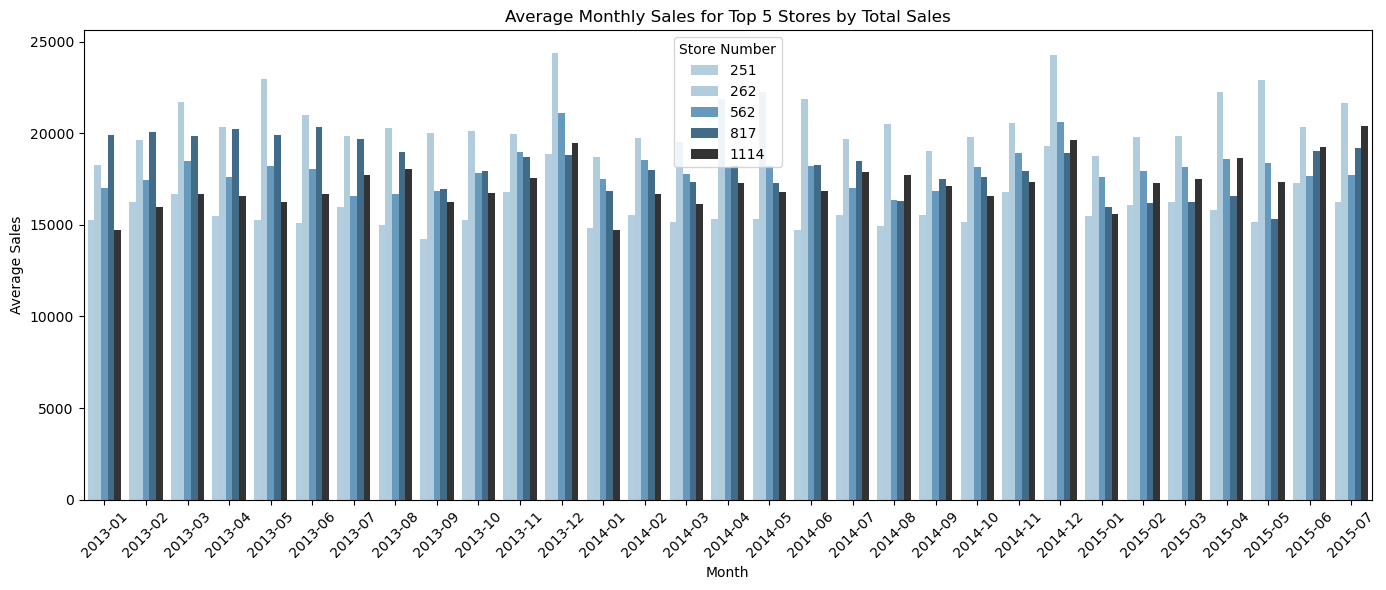

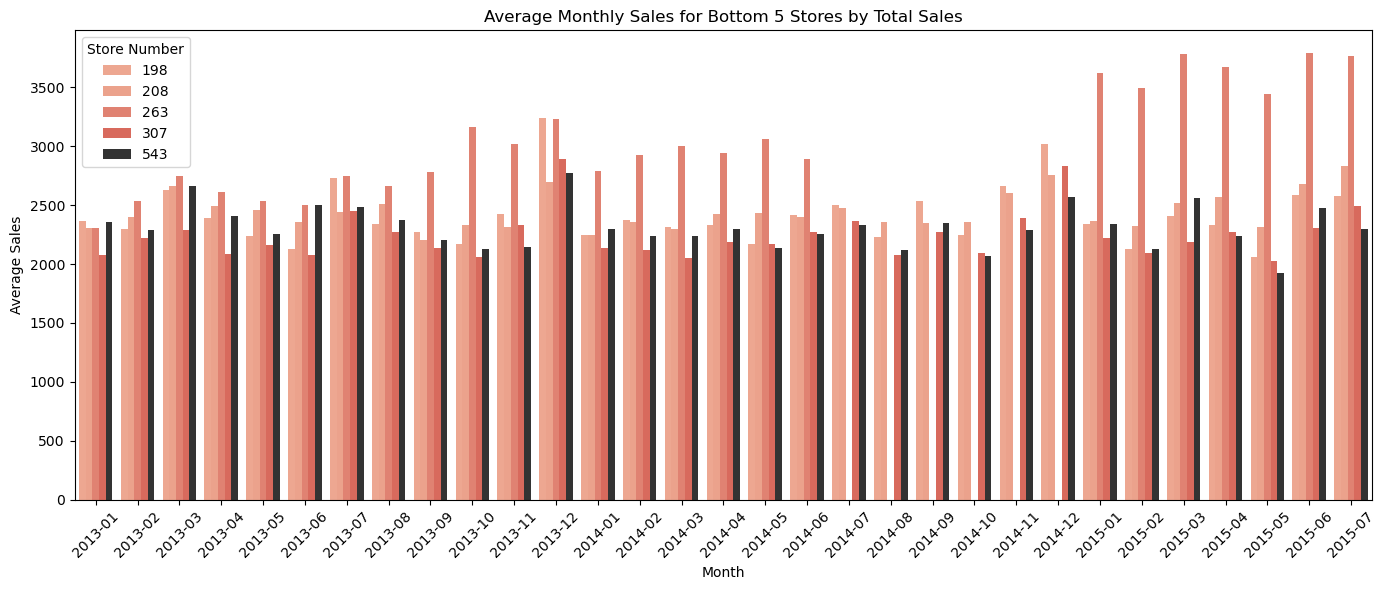

In [39]:
# Calculate total sales per store
store_total_sales = df.groupby('Store')['Sales'].sum().reset_index()

# Identify top 5 and bottom 5 stores by total sales
top_5_stores_sales = store_total_sales.nlargest(5, 'Sales')['Store']
bottom_5_stores_sales = store_total_sales.nsmallest(5, 'Sales')['Store']

# Filter data for top 5 and bottom 5 stores by total sales
top_5_sales_stores_data = df[df['Store'].isin(top_5_stores_sales)]
bottom_5_sales_stores_data = df[df['Store'].isin(bottom_5_stores_sales)]

# Calculate average monthly sales for top 5 sales stores
top_5_sales_monthly_avg = top_5_sales_stores_data.groupby([top_5_sales_stores_data['Date'].dt.to_period('M'), 'Store'])['Sales'].mean().reset_index()

# Calculate average monthly sales for bottom 5 sales stores
bottom_5_sales_monthly_avg = bottom_5_sales_stores_data.groupby([bottom_5_sales_stores_data['Date'].dt.to_period('M'), 'Store'])['Sales'].mean().reset_index()

# Plotting average monthly sales for top 5 sales stores
plt.figure(figsize=(14, 6))
sns.barplot(data=top_5_sales_monthly_avg, x='Date', y='Sales', hue='Store', palette='Blues_d')
plt.title('Average Monthly Sales for Top 5 Stores by Total Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend(title='Store Number')
plt.tight_layout()
plt.show()

# Plotting average monthly sales for bottom 5 sales stores
plt.figure(figsize=(14, 6))
sns.barplot(data=bottom_5_sales_monthly_avg, x='Date', y='Sales', hue='Store', palette='Reds_d')
plt.title('Average Monthly Sales for Bottom 5 Stores by Total Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend(title='Store Number')
plt.tight_layout()
plt.show()

## Individual Store Performance Insights

### Study Overview
The analysis focused on evaluating sales performance based on historical data from top and bottom performing stores. This analysis provides crucial insights into seasonal trends and disparities in performance across stores.

### Key Findings

#### Seasonal Trends
- Both top and bottom stores display seasonal fluctuations, with potential peaks during holiday seasons or promotional events.

#### Promotional Impact
- Periods of increased promotional activity correlate with spikes in average monthly sales, notably in top performing stores.

#### Performance Consistency
- Top stores generally maintain consistent sales across months, whereas bottom stores demonstrate greater variance, potentially indicating less customer loyalty or fewer repeat visits.

#### Geographic Influence
- The geographic location of stores can significantly influence sales, particularly if top/bottom stores form clusters in certain regions.

#### Customer Demographics
- Differences in sales may be further explained by variations in customer demographics or purchasing behaviors, which were not detailed in the current dataset.

### Graphical Insights

#### Average Monthly Sales for Top 5 Stores
- Visualizations show clear peaks and troughs over the year, with individual store performance highlighted by distinct hues.

#### Average Monthly Sales for Bottom 5 Stores
- Despite sales consistency, lower overall averages suggest these stores could benefit from targeted marketing or regional adjustments.

### Conclusion
This analysis identifies key sales trends and influences, providing strategic insights for optimizing sales strategies across stores. Future work could incorporate more granular customer data to refine these insights further.

C:\Users\Mateusz\AppData\Local\Temp\ipykernel_15556\4078043038.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_spc, x='Store', y='SalesPerCustomer', palette='Blues_d', order=top_10_spc['Store'])


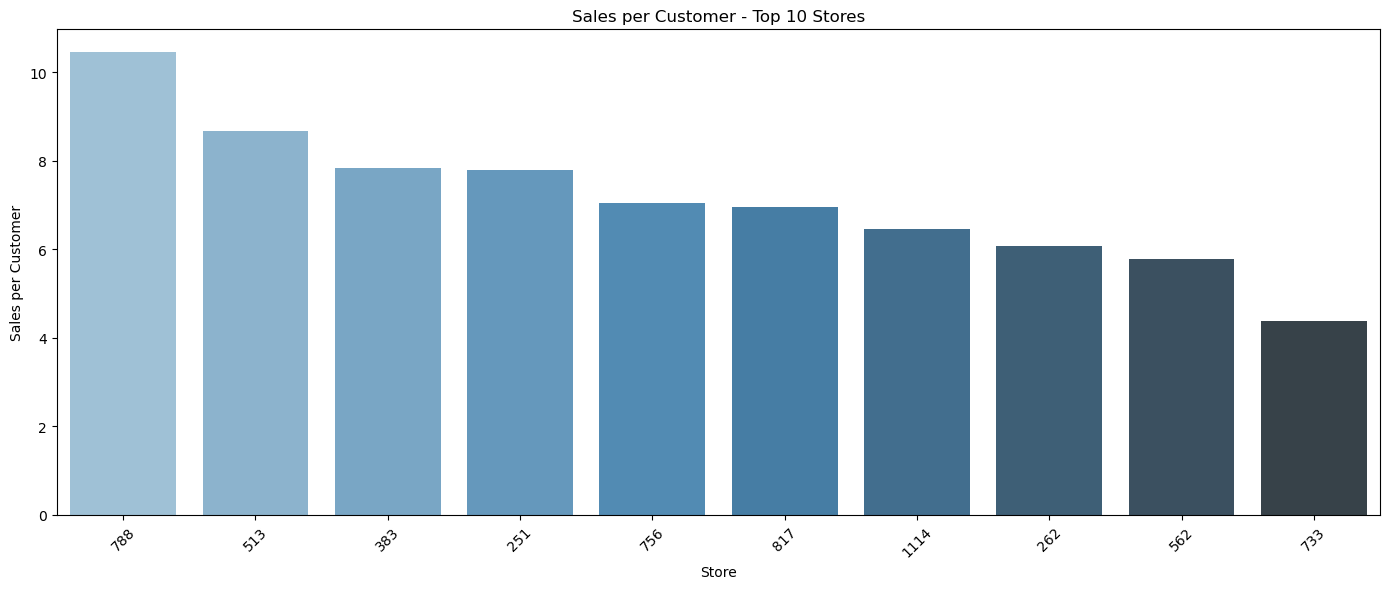

C:\Users\Mateusz\AppData\Local\Temp\ipykernel_15556\4078043038.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_spc, x='Store', y='SalesPerCustomer', palette='Reds_d', order=bottom_10_spc['Store'])


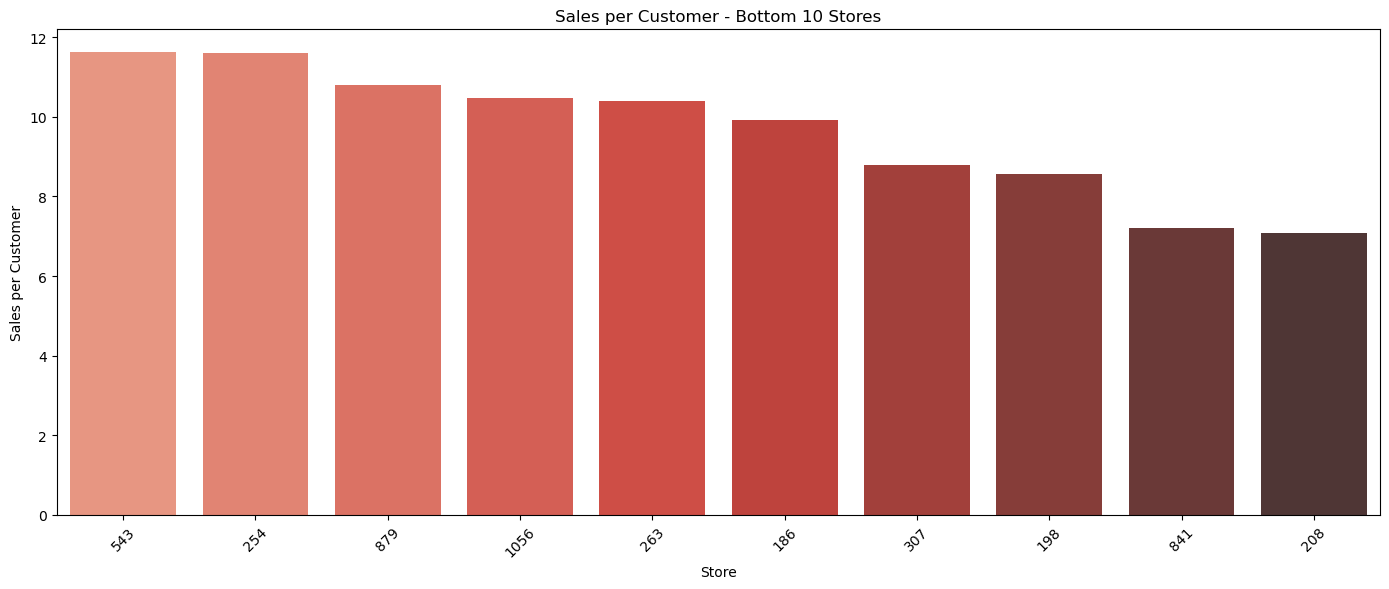

In [41]:
# Calculate Sales per Customer per Store
sales_per_customer = df.groupby('Store').agg({'Sales': 'sum', 'Customers': 'sum'}).reset_index()
sales_per_customer['SalesPerCustomer'] = sales_per_customer['Sales'] / sales_per_customer['Customers']

# Get top 10 and bottom 10 stores by total sales
top_10_stores = store_sales_summary.head(10)['Store'].tolist()
bottom_10_stores = store_sales_summary.tail(10)['Store'].tolist()

# Filter sales per customer for top and bottom stores, and sort by SalesPerCustomer in descending order
top_10_spc = sales_per_customer[sales_per_customer['Store'].isin(top_10_stores)].sort_values(by='SalesPerCustomer', ascending=False)
bottom_10_spc = sales_per_customer[sales_per_customer['Store'].isin(bottom_10_stores)].sort_values(by='SalesPerCustomer', ascending=False)

# Plot comparison for top 10 stores
plt.figure(figsize=(14, 6))
sns.barplot(data=top_10_spc, x='Store', y='SalesPerCustomer', palette='Blues_d', order=top_10_spc['Store'])
plt.title('Sales per Customer - Top 10 Stores')
plt.xlabel('Store')
plt.ylabel('Sales per Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot comparison for bottom 10 stores
plt.figure(figsize=(14, 6))
sns.barplot(data=bottom_10_spc, x='Store', y='SalesPerCustomer', palette='Reds_d', order=bottom_10_spc['Store'])
plt.title('Sales per Customer - Bottom 10 Stores')
plt.xlabel('Store')
plt.ylabel('Sales per Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Store Performance Insights

#### Top Stores Insights

- **Store 788** stands out with the highest Sales per Customer (10.45), indicating strong spending per visitor.
- Stores like **733**, while having high total sales and footfall, see lower efficiency per customer (4.39).
- There seems to be an inverse relationship in some cases between customer volume and per-customer spend.

#### Bottom Stores Insights

- Despite being in the "bottom" list, these stores actually have higher Sales per Customer than those in the top list due to lower overall volume.
- **Store 543** (11.62) leads in customer spend but likely operates at a much smaller scale.
- These stores could represent premium or boutique locations with fewer, high-spending customers.

#### Key Takeaways

- High Sales per Customer doesn't always mean high overall sales—context matters.
- Top-performing stores like **788** strike a balance between volume and customer spending.
- Low-traffic, high-yield stores (like **543**) may suggest a niche or luxury offering.
- Further analysis could explore location type, promotions, or customer demographics to better understand patterns.

C:\Users\Mateusz\AppData\Local\Temp\ipykernel_15556\1720529234.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, x='Store', y='AvgCustomersPerDay', palette=palette, order=data['Store'])


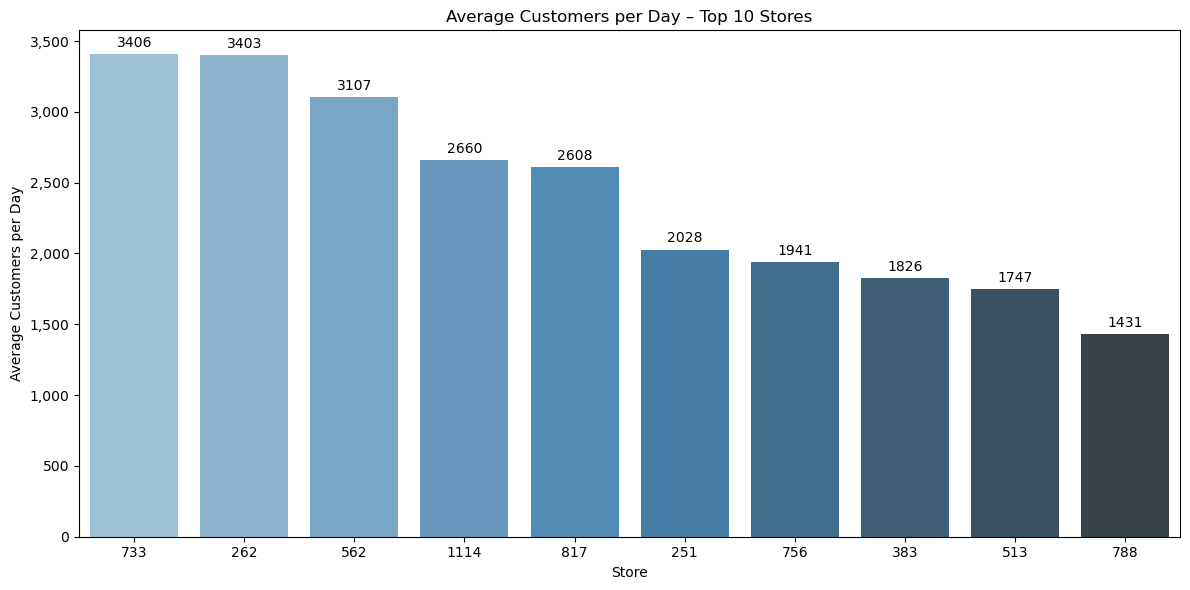

C:\Users\Mateusz\AppData\Local\Temp\ipykernel_15556\1720529234.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, x='Store', y='AvgCustomersPerDay', palette=palette, order=data['Store'])


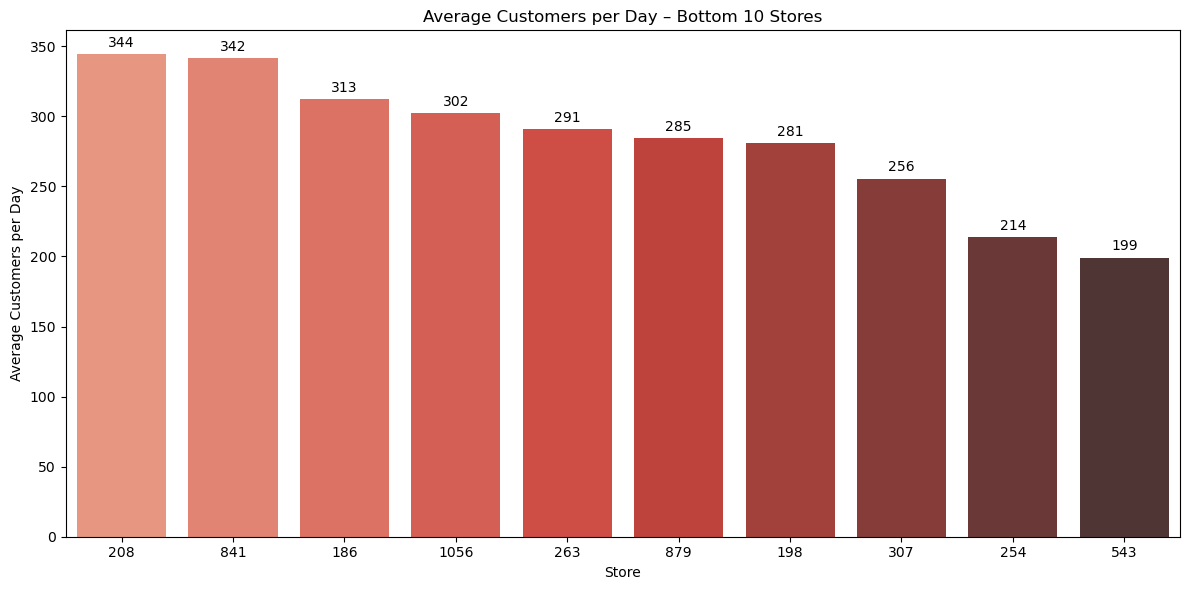

In [49]:
# Calculate average number of customers per day for each store
avg_customers_per_day = df.groupby('Store')['Customers'].mean().reset_index(name='AvgCustomersPerDay')

# Get top 10 and bottom 10 stores by total sales
top_10_stores = store_sales_summary.head(10)['Store'].tolist()
bottom_10_stores = store_sales_summary.tail(10)['Store'].tolist()

# Filter for top and bottom 10 stores, and sort by AvgCustomersPerDay in descending order
top_10_customers = avg_customers_per_day[avg_customers_per_day['Store'].isin(top_10_stores)].sort_values(by='AvgCustomersPerDay', ascending=False)
bottom_10_customers = avg_customers_per_day[avg_customers_per_day['Store'].isin(bottom_10_stores)].sort_values(by='AvgCustomersPerDay', ascending=False)

# Plot function with colors and descending order
def plot_avg_customers(data, title, palette):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=data, x='Store', y='AvgCustomersPerDay', palette=palette, order=data['Store'])
    ax.set_title(title)
    ax.set_ylabel('Average Customers per Day')
    
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=3)
    plt.tight_layout()
    plt.show()

# Plot with color palettes for distinguishing top and bottom stores
plot_avg_customers(top_10_customers, 'Average Customers per Day – Top 10 Stores', 'Blues_d')
plot_avg_customers(bottom_10_customers, 'Average Customers per Day – Bottom 10 Stores', 'Reds_d')

### Store Performance Insights

#### 📌 Top Stores Insights:
- **Stores 733 and 262**: Nearly tied at the top with over 3,400 daily visitors, suggesting that these are high-traffic locations such as malls or transit centers.
- **Opportunity for Upsell**: Despite the high footfall, stores like 733 have low sales per customer, indicating potential areas for upselling.
- **Balanced Stores**: Stores 251, 756, and 513 demonstrate a good balance of customer traffic and efficiency, also appearing on the top sales-per-customer list.

#### 📌 Bottom Stores Insights:
- **Low Traffic**: These stores receive fewer than 350 daily customers, potentially due to location, store type, or limited marketing efforts.
- **High-Value Customers**: Surprisingly, stores like 543, 254, and 879 appear on the top sales per customer list, indicating fewer but more valuable customers.
- **Strategic Focus**: Strategies like local promotions or digital outreach could help increase foot traffic while maintaining customer quality.

#### 💡 Key Takeaways
- **Traffic ≠ Profit**: High daily customer counts do not always translate to high sales per customer. Both volume and value must be optimized.
- **Low-Traffic, High-Yield Stores**: Stores like 543 and 254 demonstrate that fewer, more engaged customers can outperform crowded, low-conversion stores.
- **Focus Areas for Top Traffic Stores**: Strategies should concentrate on improving conversion rates and increasing basket size.
- **Next Steps**: Analyze store locations, formats, and customer behavior to replicate the success of high-performing outliers.

# 📊 EDA Summary

## 🔍 Dataset Overview
- **Size:** 1,001,599 records | 10 columns
- **No missing values detected.**
- **Key Columns:** Store, Sales, Customers, Promo, StateHoliday, Date (converted to datetime).
- **Sales & Customers:** Right-skewed with outliers.
- **Store Status:** Most days are non-holidays, and most records are for open stores.

## 📈 Univariate Analysis
- **Sales & Customers:** 
  - Skewed right 
  - Most transactions are low to mid-range.
- **Open & Promo:**
  - ~85% records for open days.
  - ~38% entries involve promotion.
- **StateHoliday:** 
  - Few holidays; categories `a`, `b`, and `c` indicate special holiday types.
- **DayOfWeek:** 
  - Fairly uniform activity.
  - Sundays (7) have the least activity (many stores closed).

## 🔗 Bivariate & Temporal Analysis
- **Sales vs Customers:** 
  - Strong positive correlation (0.81) – more customers = more sales.
- **Promo Impact:** 
  - Mild sales boost; not always consistent.
- **Day of the Week:**
  - Saturday sees a sales peak.
  - Sundays often experience closure.
- **State Holidays:** 
  - Correlate with lower sales but occasional high outliers.
- **Seasonality:**
  - Sales spike in Q4 (holiday season).
  - Stable but cyclical trend overall.
- **Yearly Trend:** 
  - Slight upward trend in later years – possible expansion or economic growth.

## 🏪 Store-Level Analysis
- **🔝 Top vs Bottom Stores (by total sales):**
  - **Top 5 Stores:** Display strong seasonality & consistent performance.
  - **Bottom 5 Stores:** Experience lower and erratic monthly sales — potential for targeted improvements.
  
- **📊 Sales Per Customer:**
  - **Top Store:** Store 788 – high customer spending (10.45).
  - **High-Yield, Low-Volume Stores:** e.g., Store 543 – boutique-like performance (11.62 per customer).
  - **Insight:** Some top stores have volume but low per-customer yield – upsell potential exists.

- **👥 Customer Traffic (Avg Daily Visitors):**
  - **Top Traffic Stores:** Stores 733 & 262 – over 3,400 daily customers.
  - **Bottom Traffic Stores:** Fewer than 350 customers/day, but some show high spending per visit.

## 💡 Key Business Insights
- **Optimize Promotions:** Not all promotions translate into high sales; targeting matters.
- **Upsell Opportunity:** High-traffic stores with low conversion should be optimized.
- **Low-Volume, High-Yield Stores:** Worth deeper investigation – potential for premium branding or niche marketing.
- **Seasonality Awareness:** Align marketing and stock strategies with Q4 demand surges.
- **Next Steps:** Incorporate geographic and customer demographic data for deeper insight.

